# Quiz 2: Module Bayesiano para determinar si hay que racionar o no
## Alumno: Yoksan Varela Cambronero
### Cedula: 206100530

### Librerias

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Para remover Warnings
import warnings
warnings.filterwarnings("ignore")

### **Pregunta #1**: Usando pytorch, use el histograma de los datos anteriores para estimar las densidades p (m1|t = 0), p (m1|t = 1) ,p (m2|t = 0), p (m2|t = 1). m1 = p (primer dimension) y m2 = v (segunda dimension)

De primera entrada, se crean los dos tensores con la informacion original:

In [2]:
# Datos para la variable aleatoria P
P = torch.tensor([[5,6,9,11,12,16,18,13,5,2],[20,13,12,4,2,1,2,1,2,1]])
print("Variable Aleatoria P:\n",P,"\n")

# Datos para la variable aleatoria V
V = torch.tensor([[2,3,5,15,6,3,1,0,0,0],[22,15,8,3,2,1,0,0,0,0]])
print("Variable Aleatoria V:\n",V)



Variable Aleatoria P:
 tensor([[ 5,  6,  9, 11, 12, 16, 18, 13,  5,  2],
        [20, 13, 12,  4,  2,  1,  2,  1,  2,  1]]) 

Variable Aleatoria V:
 tensor([[ 2,  3,  5, 15,  6,  3,  1,  0,  0,  0],
        [22, 15,  8,  3,  2,  1,  0,  0,  0,  0]])


In [3]:
def prob_a_priori(data):
    data_t_0 = data[0,:]
    data_t_1 = data[1,:]
    
    N = torch.sum(data)
    
    return torch.tensor([[torch.sum(data_t_0)/N],[torch.sum(data_t_1)/N]])

In [4]:
# Calculando el tensor con los probabilidades a priori de m1
p_priori_m1 = prob_a_priori(P)
print(p_priori_m1)

# Calculando el tensor con los probabilidades a priori de m2
p_priori_m2 = prob_a_priori(V)
print(p_priori_m2)


tensor([[0.6258],
        [0.3742]])
tensor([[0.4070],
        [0.5930]])


In [5]:
def prob_p_t(data):
    data_t_0 = data[0,:]
    data_t_1 = data[1,:]
    
    t0_sum = torch.sum(data_t_0)
    t1_sum = torch.sum(data_t_1)
    
    p_m_t_0 = torch.tensor(data_t_0/t0_sum)
    p_m_t_1 = torch.tensor(data_t_1/t1_sum)
    
    p_m_t = torch.concat([p_m_t_0,p_m_t_1])
    p_m_t = p_m_t.view(2,10)
    
    return torch.tensor(p_m_t)

In [6]:
# Calculando p(m1|t)
p_m1_t = prob_p_t(P)
print(p_m1_t)

# Calculando p(m2|t)
p_m2_t = prob_p_t(V)
print(p_m2_t)

tensor([[0.0515, 0.0619, 0.0928, 0.1134, 0.1237, 0.1649, 0.1856, 0.1340, 0.0515,
         0.0206],
        [0.3448, 0.2241, 0.2069, 0.0690, 0.0345, 0.0172, 0.0345, 0.0172, 0.0345,
         0.0172]])
tensor([[0.0571, 0.0857, 0.1429, 0.4286, 0.1714, 0.0857, 0.0286, 0.0000, 0.0000,
         0.0000],
        [0.4314, 0.2941, 0.1569, 0.0588, 0.0392, 0.0196, 0.0000, 0.0000, 0.0000,
         0.0000]])


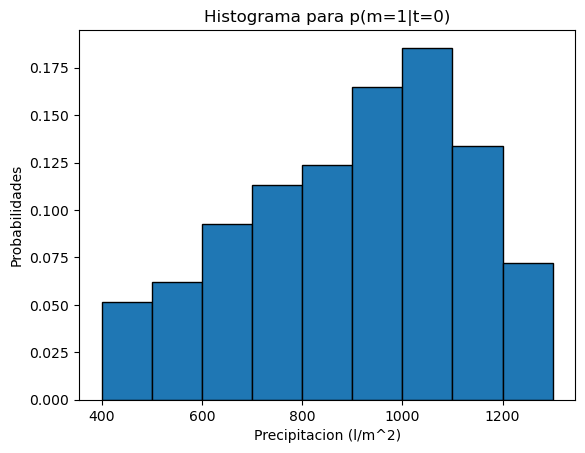

In [7]:
# Creando el histograma para p(m1|t=0)
m1_bins = np.array([400,500,600,700,800,900,1000,1100,1200,1300])

plt.hist(m1_bins, bins=m1_bins, weights=p_m1_t[0,:], edgecolor='black')
plt.xlabel('Precipitacion (l/m^2)')
plt.ylabel('Probabilidades')
plt.title('Histograma para p(m=1|t=0)')
plt.show()


Para p(m1|t=0), la distribucion de los datos es Gaussiana con un skew negativo.

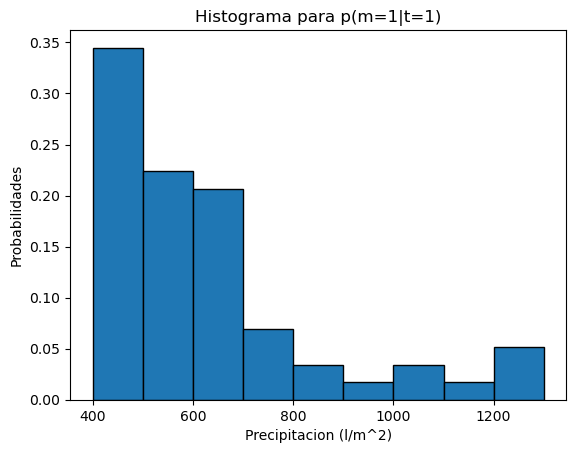

In [8]:
# Creando el histograma para p(m1|t=1)
plt.hist(m1_bins, bins=m1_bins, weights=p_m1_t[1,:], edgecolor='black')
plt.xlabel('Precipitacion (l/m^2)')
plt.ylabel('Probabilidades')
plt.title('Histograma para p(m=1|t=1)')
plt.show()

Para p(m1|t=1), la distribucion de los datos es Exponencial.

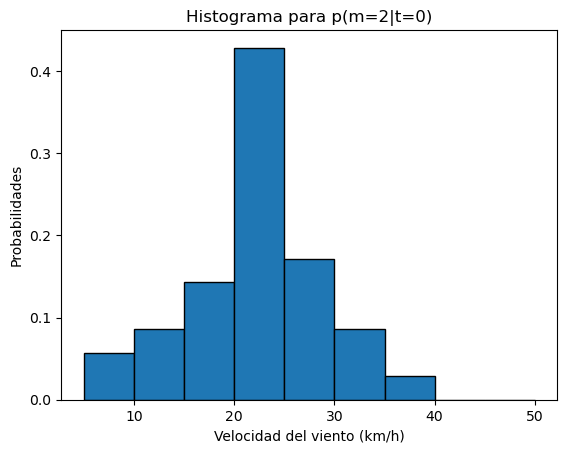

In [9]:
# Creando el histograma para p(m2|t=0)
m2_bins = np.array([5,10,15,20,25,30,35,40,45,50])

plt.hist(m2_bins, bins=m2_bins, weights=p_m2_t[0,:], edgecolor='black')
plt.xlabel('Velocidad del viento (km/h)')
plt.ylabel('Probabilidades')
plt.title('Histograma para p(m=2|t=0)')
plt.show()

Para p(m2|t=0), la distribucion de los datos es Gaussiana, con una media muy elevada, lo que sugiere que el Kurtosis de esta muestra es pequeno.

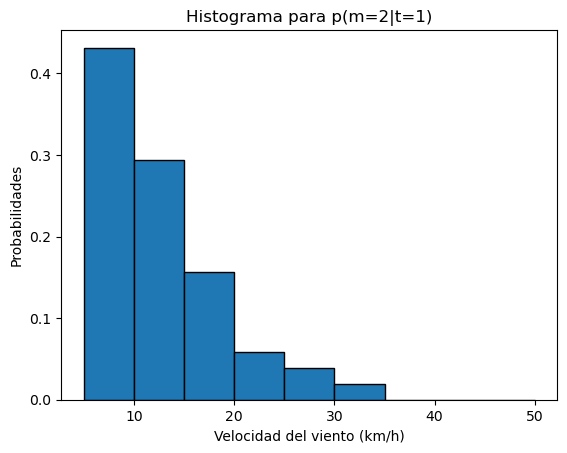

In [10]:
# Creando el histograma para p(m2|t=1)
plt.hist(m2_bins, bins=m2_bins, weights=p_m2_t[1,:], edgecolor='black')
plt.xlabel('Velocidad del viento (km/h)')
plt.ylabel('Probabilidades')
plt.title('Histograma para p(m=2|t=1)')
plt.show()

Para p(m2|t=1), la distribucion de los datos es Exponencial.

### **Pregunta #2**: Utilizando los graficos anteriores, ajuste un modelo Gaussiano o exponencial, segun sea necesario (realice la justificacion segun lo observado en tales graficos), a cada una de las densidades p (m1|t = 0), p (m1|t = 1) ,p (m2|t = 0), p (m2|t = 1). Muestre los pasos intermedios para estimar los parametros de tales modelos y documentelos. Grafique el modelo ajustado y muestre las tablas 1 y 2 con las probabilidades estimadas por estos nuevos modelos.

Se crean dos funciones, uno para un modelo Gaussiano y otro para un modelo Exponencial:

In [11]:
def gauss_model(data,mean,sigma):
    fraction = 1/(sigma * (torch.sqrt(torch.tensor(2 * torch.pi))))
    exponential = torch.exp(torch.tensor((-1/2) * ((data - mean)/sigma)**2))
    prob_gauss = fraction * exponential
    return prob_gauss

In [12]:
def exp_model(data,lambda_dist):
    prob_exp = lambda_dist * torch.exp(torch.tensor(-lambda_dist * data))
    return prob_exp

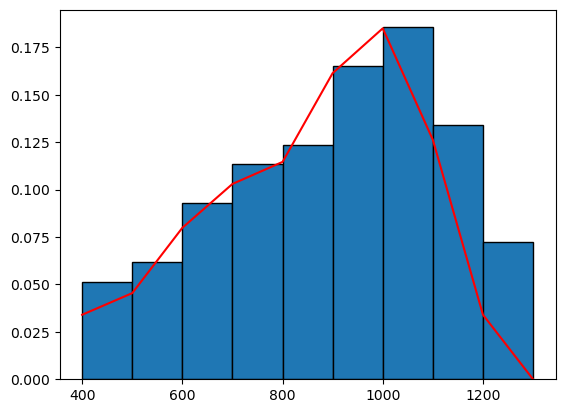

In [16]:
# Probabilidad gaussiana de p(m1|t=0)
p_m1_t0_mean = np.mean(P[0,:].numpy())
p_m1_t0_std = np.std(P[0,:].numpy())

# Creando la funcion de densidad gaussiana
x = torch.linspace(400,1300,10)
prob_m1_t0_densfunct = gauss_model(p_m1_t[0,:],p_m1_t0_mean,p_m1_t0_std)

# Normalizando para que pueda ser visible junto con el histograma
prob_m1_t0_densfunct_norm = ((prob_m1_t0_densfunct - prob_m1_t0_densfunct.min())/(prob_m1_t0_densfunct.max() - prob_m1_t0_densfunct.min()))*0.185

plt.plot(x.numpy(),prob_m1_t0_densfunct_norm.numpy(), color='red')
plt.hist(m1_bins, bins=m1_bins, weights=p_m1_t[0,:], edgecolor='black')
plt.show()

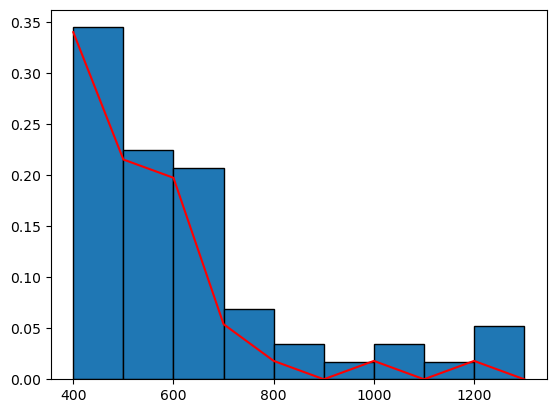

In [14]:
# Probabilidad gaussiana de p(m1|t=1)
p_m1_t1_mean = np.mean(P[1,:].numpy())
p_m1_t1_std = np.std(P[1,:].numpy())

# Creando la funcion de densidad gaussiana
x = torch.linspace(400,1300,10)
prob_m1_t1_densfunct = gauss_model(p_m1_t[1,:],p_m1_t1_mean,p_m1_t1_std)

# Normalizando para que pueda ser visible junto con el histograma
prob_m1_t1_densfunct_norm = ((prob_m1_t1_densfunct - prob_m1_t1_densfunct.min())/(prob_m1_t1_densfunct.max() - prob_m1_t1_densfunct.min()))*0.34

plt.plot(x.numpy(),prob_m1_t1_densfunct_norm.numpy(), color='red')
plt.hist(m1_bins, bins=m1_bins, weights=p_m1_t[1,:], edgecolor='black')
plt.show()

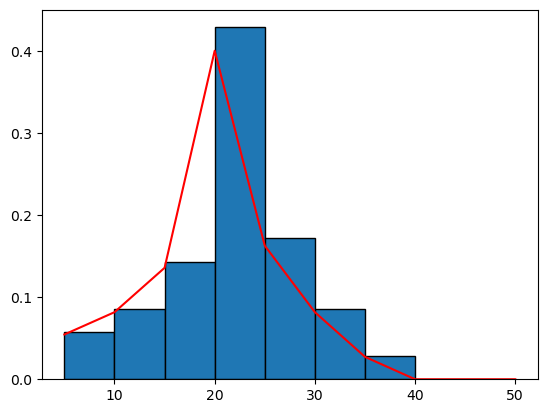

In [22]:
# Probabilidad gaussiana de p(m2|t=0)
p_m2_t0_mean = np.mean(V[0,:].numpy())
p_m2_t0_std = np.std(V[0,:].numpy())

# Creando la funcion de densidad gaussiana
x = torch.linspace(5,50,10)
prob_m2_t0_densfunct = gauss_model(p_m2_t[0,:],p_m2_t0_mean,p_m2_t0_std)

# Normalizando para que pueda ser visible junto con el histograma
prob_m2_t0_densfunct_norm = ((prob_m2_t0_densfunct - prob_m2_t0_densfunct.min())/(prob_m2_t0_densfunct.max() - prob_m2_t0_densfunct.min()))*0.4

plt.plot(x.numpy(),prob_m2_t0_densfunct_norm.numpy(), color='red')
plt.hist(m2_bins, bins=m2_bins, weights=p_m2_t[0,:], edgecolor='black')
plt.show()

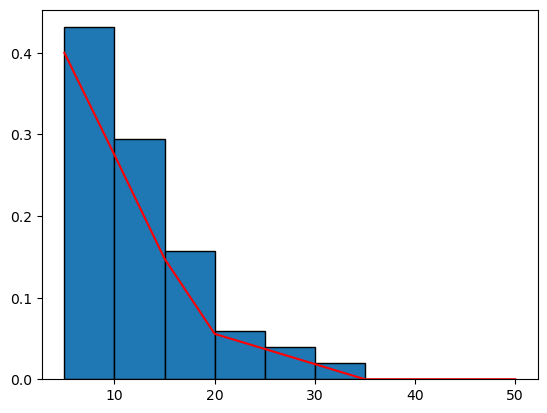

In [23]:
# Probabilidad gaussiana de p(m2|t=1)
p_m2_t1_mean = np.mean(V[1,:].numpy())
p_m2_t1_std = np.std(V[1,:].numpy())

# Creando la funcion de densidad gaussiana
x = torch.linspace(5,50,10)
prob_m2_t1_densfunct = gauss_model(p_m2_t[1,:],p_m2_t1_mean,p_m2_t1_std)

# Normalizando para que pueda ser visible junto con el histograma
prob_m2_t1_densfunct_norm = ((prob_m2_t1_densfunct - prob_m2_t1_densfunct.min())/(prob_m2_t1_densfunct.max() - prob_m2_t1_densfunct.min()))*0.4

plt.plot(x.numpy(),prob_m2_t1_densfunct_norm.numpy(), color='red')
plt.hist(m2_bins, bins=m2_bins, weights=p_m2_t[1,:], edgecolor='black')
plt.show()